In [1]:
import pandas as pd
import os
import numpy as np
import json

In [2]:
def get_no_prune_results(data_name):
    score_folder = f'informed_undersampling/{data_name}_f1_scores'
    with open(os.path.join(score_folder, '0_prune_scores_agg.json'), 'r') as no_prune_scores_file:
        no_prune_scores = json.load(no_prune_scores_file)
    return no_prune_scores

In [3]:
no_prune_sexism = get_no_prune_results(data_name = 'sexism_data')
no_prune_sexism_eval = get_no_prune_results(data_name = 'sexism_eval')
no_prune_ood_1 = get_no_prune_results(data_name = 'ood_1')
no_prune_ood_3 = get_no_prune_results(data_name = 'ood_3')
no_prune_counterfactual = get_no_prune_results(data_name = 'counterfactual')

In [4]:
def get_random_submodular_scores(data_name, prune_type, no_prune_data):
    f1_scores = {'prune_rates':[], 'mean':[], 'std':[]}
    f1_scores['prune_rates'].append(0)
    f1_scores['mean'].append(no_prune_data['mean'])
    f1_scores['std'].append(no_prune_data['std'])
    if prune_type == 'random':
        score_folder = f'random_run_results/{data_name}_f1_scores'
        with open(os.path.join(score_folder, f'{prune_type}_all_scores_agg.json'), 'r') as scores_file:
            random_scores = json.load(scores_file)
        f1_scores['prune_rates'].extend(random_scores['prune_rates'])
        f1_scores['mean'].extend(random_scores['mean'])
        f1_scores['std'].extend(random_scores['std'])
        f1_scores['prune_rates'] = np.array(f1_scores['prune_rates'], dtype = float)
        f1_scores['mean'] = np.array(f1_scores['mean'])
        f1_scores['std'] = np.array(f1_scores['std'])
        return f1_scores
    elif prune_type == 'submod':
        score_folder = f'cluster_analysis/submodular_pruning/{data_name}_f1_scores'
        with open(os.path.join(score_folder, f'{prune_type}_all_scores_agg.json'), 'r') as scores_file:
            submod_scores = json.load(scores_file)
        f1_scores['prune_rates'].extend([int(prune_rate) for prune_rate in submod_scores['prune_rates']])
        f1_scores['mean'].extend(submod_scores['mean'])
        f1_scores['std'].extend(submod_scores['std'])
        f1_scores['prune_rates'] = np.array(f1_scores['prune_rates'], dtype = float)
        f1_scores['mean'] = np.array(f1_scores['mean'])
        f1_scores['std'] = np.array(f1_scores['std'])
        return f1_scores

In [5]:
random_scores_sexism = get_random_submodular_scores(data_name = 'sexism_data', prune_type = 'random', no_prune_data = no_prune_sexism)
random_scores_sexism_eval = get_random_submodular_scores(data_name = 'sexism_eval', prune_type = 'random', no_prune_data = no_prune_sexism_eval)
random_scores_ood_1 = get_random_submodular_scores(data_name = 'ood_1', prune_type = 'random', no_prune_data = no_prune_ood_1)
random_scores_ood_3 = get_random_submodular_scores(data_name = 'ood_3', prune_type = 'random', no_prune_data = no_prune_ood_3)
random_scores_counterfactual = get_random_submodular_scores(data_name='counterfactual', prune_type = 'random', no_prune_data = no_prune_counterfactual)
submod_scores_sexism = get_random_submodular_scores(data_name = 'sexism_data', prune_type = 'submod', no_prune_data = no_prune_sexism)
submod_scores_sexism_eval = get_random_submodular_scores(data_name = 'sexism_eval', prune_type = 'submod', no_prune_data = no_prune_sexism_eval)
submod_scores_ood_1 = get_random_submodular_scores(data_name = 'ood_1', prune_type = 'submod', no_prune_data = no_prune_ood_1)
submod_scores_ood_3 = get_random_submodular_scores(data_name = 'ood_3', prune_type = 'submod', no_prune_data = no_prune_ood_3)
submod_scores_counterfactual = get_random_submodular_scores(data_name='counterfactual', prune_type = 'submod', no_prune_data = no_prune_counterfactual)

In [6]:
def get_informed_undersampling_scores(data_name, inf_score, prune_type, no_prune_data):
    score_folder = f'informed_undersampling/{data_name}_f1_scores'
    f1_scores = {'prune_rates': [], 'mean':[], 'std':[]}
    f1_scores = {'prune_rates':[], 'mean':[], 'std':[]}
    f1_scores['prune_rates'].append(0)
    f1_scores['mean'].append(no_prune_data['mean'])
    f1_scores['std'].append(no_prune_data['std'])
    with open(os.path.join(score_folder, f'{inf_score}_{prune_type}_scores_agg.json'), 'r') as scores_json:
        scores = json.load(scores_json)
    f1_scores['prune_rates'].extend([int(prune_rate) for prune_rate in scores['prune_rates']])
    f1_scores['mean'].extend(scores['mean'])
    f1_scores['std'].extend(scores['std'])
    f1_scores['prune_rates'] = np.array(f1_scores['prune_rates'], dtype = float)
    f1_scores['mean'] = np.array(f1_scores['mean'])
    f1_scores['std'] = np.array(f1_scores['std'])
    return f1_scores

In [7]:
el2n_easy_sexism = get_informed_undersampling_scores(data_name = 'sexism_data', inf_score = 'el2n', prune_type = 'easy', no_prune_data = no_prune_sexism)
el2n_hard_sexism = get_informed_undersampling_scores(data_name = 'sexism_data', inf_score = 'el2n', prune_type = 'hard', no_prune_data = no_prune_sexism)
pvi_easy_sexism = get_informed_undersampling_scores(data_name = 'sexism_data', inf_score = 'pvi', prune_type = 'easy', no_prune_data = no_prune_sexism)
pvi_hard_sexism = get_informed_undersampling_scores(data_name = 'sexism_data', inf_score = 'pvi', prune_type = 'hard', no_prune_data = no_prune_sexism)

In [8]:
def get_proportional_scores(data_name, inf_score, prune_type_sexist, prune_type_non_sexist, no_prune_data):
    score_folder = f'proportional_sampling/{data_name}_f1_scores'
    f1_scores = {'prune_rates': [], 'mean':[], 'std':[]}
    f1_scores = {'prune_rates':[], 'mean':[], 'std':[]}
    f1_scores['prune_rates'].append(0)
    f1_scores['mean'].append(no_prune_data['mean'])
    f1_scores['std'].append(no_prune_data['std'])
    with open(os.path.join(score_folder, f'{inf_score}_{prune_type_sexist}_{prune_type_non_sexist}_scores_agg.json'), 'r') as scores_json:
        scores = json.load(scores_json)
    f1_scores['prune_rates'].extend([int(prune_rate) for prune_rate in scores['prune_rates']])
    f1_scores['mean'].extend(scores['mean'])
    f1_scores['std'].extend(scores['std'])
    f1_scores['prune_rates'] = np.array(f1_scores['prune_rates'], dtype = float)
    f1_scores['mean'] = np.array(f1_scores['mean'])
    f1_scores['std'] = np.array(f1_scores['std'])
    return f1_scores

In [9]:
el2n_easy_easy_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'el2n', prune_type_sexist = 'easy', 
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism)
el2n_easy_hard_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'el2n', prune_type_sexist = 'easy',
                                                prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism)
el2n_hard_easy_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'el2n', prune_type_sexist = 'hard',
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism)
el2n_hard_hard_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'el2n', prune_type_sexist = 'hard',
                                                prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism)
pvi_easy_easy_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'pvi', prune_type_sexist = 'easy', 
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism)
pvi_easy_hard_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'pvi', prune_type_sexist = 'easy',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism)
pvi_hard_easy_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism)
pvi_hard_hard_sexism = get_proportional_scores(data_name = 'sexism_data', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def get_plots_informed(pvi_easy_scores, pvi_hard_scores, el2n_easy_scores, el2n_hard_scores, submod_scores,
              random_scores,fig_name, title):
    plt.rcParams.update({'font.size': 22})
    plt.rcParams["figure.figsize"] = (20, 5)
    sns.set_theme(style="whitegrid")

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.tight_layout()
    ax1.plot(pvi_easy_scores['prune_rates'], pvi_easy_scores['mean'], marker = 'o', color = 'blue', label = 'easy')
    ax1.fill_between(pvi_easy_scores['prune_rates'], pvi_easy_scores['mean'] + pvi_easy_scores['std'],
                     y2 = pvi_easy_scores['mean'] - pvi_easy_scores['std'], alpha = 0.2)
    ax1.plot(pvi_hard_scores['prune_rates'], pvi_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard')
    ax1.fill_between(x = pvi_hard_scores['prune_rates'], y1 = pvi_hard_scores['mean'] + pvi_hard_scores['std'],
                     y2 = pvi_hard_scores['mean'] - pvi_hard_scores['std'], alpha = 0.2)
    ax1.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 'v', color = 'teal', label = 'submodular')
    ax1.fill_between(submod_scores['prune_rates'],  y1 = np.asarray(submod_scores['mean']) + np.asarray(submod_scores['std']),
                     y2 = np.asarray(submod_scores['mean']) - np.asarray(submod_scores['std']), alpha = 0.2)
    ax1.plot(random_scores['prune_rates'], random_scores['mean'], marker = 's', color = 'orange', label = 'random')
    ax1.fill_between(random_scores['prune_rates'], y1 = np.asarray(random_scores['mean']) + np.asarray(random_scores['std']),
                     y2 = np.asarray(random_scores['mean']) - np.asarray(random_scores['std']), alpha = 0.2)
    ax1.set_ylim([0.2, 0.9])
    ax1.set_xlim([-1, 65])
    ax1.set_xlabel('Prune Rates')
    ax1.set_ylabel(title)
    ax1.set_title('Pointwise V-Information')
    ax1.legend(loc = 'best')
    ax2.plot(el2n_easy_scores['prune_rates'], el2n_easy_scores['mean'], marker = 'o', color = 'blue', label = 'easy')
    ax2.fill_between(el2n_easy_scores['prune_rates'], np.array(el2n_easy_scores['mean']) + np.array(el2n_easy_scores['std']),
                     np.array(el2n_easy_scores['mean']) - np.array(el2n_easy_scores['std']), alpha = 0.2)
    ax2.plot(el2n_hard_scores['prune_rates'], el2n_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard')
    ax2.fill_between(el2n_hard_scores['prune_rates'], np.array(el2n_hard_scores['mean']) + np.array(el2n_hard_scores['std']),
                     np.array(el2n_hard_scores['mean']) - np.array(el2n_hard_scores['std']), alpha = 0.2)
    ax2.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 'v', color = 'teal', label = 'submodular')
    ax2.fill_between(submod_scores['prune_rates'], np.array(submod_scores['mean']) + np.array(submod_scores['std']),
                     np.array(submod_scores['mean']) - np.array(submod_scores['std']), alpha = 0.2)
    ax2.plot(random_scores['prune_rates'], random_scores['mean'], marker = 's', color = 'orange', label = 'random')
    ax2.fill_between(random_scores['prune_rates'], np.array(random_scores['mean']) + np.array(random_scores['std']),
                     np.array(random_scores['mean']) - np.array(random_scores['std']), alpha = 0.2)
    ax2.set_ylim([0.2, 0.9])
    ax2.set_xlim([-1, 65])
    ax2.set_xlabel('Prune Rates')
    ax2.set_title('Error L2 Norm')
    ax2.legend(loc = 'best')
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    plt.savefig(os.path.join("figures", f'{fig_name}.pdf'), bbox_inches = 'tight')
    plt.show()

In [12]:
def get_proportional_plots(pvi_hard_easy_scores, pvi_hard_hard_scores, pvi_easy_hard_scores, pvi_easy_easy_scores,
              el2n_hard_easy_scores, el2n_hard_hard_scores, el2n_easy_hard_scores, el2n_easy_easy_scores,
              random_scores, submod_scores, fig_name, title):
    plt.rcParams.update({'font.size': 22})
    sns.set_theme(style="whitegrid")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
    fig.tight_layout()
    ax1.plot(pvi_hard_easy_scores['prune_rates'], pvi_hard_easy_scores['mean'], marker = 'o', color = 'blue', label = 'hard-easy')
    ax1.fill_between(pvi_hard_easy_scores['prune_rates'], np.array(pvi_hard_easy_scores['mean']) + np.array(pvi_hard_easy_scores['std']),
                     np.array(pvi_hard_easy_scores['mean']) - np.array(pvi_hard_easy_scores['std']), alpha = 0.2)
    ax1.plot(pvi_hard_hard_scores['prune_rates'], pvi_hard_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard-hard')
    ax1.fill_between(pvi_hard_hard_scores['prune_rates'], np.array(pvi_hard_hard_scores['mean']) + np.array(pvi_hard_hard_scores['std']),
                     np.array(pvi_hard_hard_scores['mean']) - np.array(pvi_hard_hard_scores['std']), alpha = 0.2)
    ax1.plot(pvi_easy_hard_scores['prune_rates'], pvi_easy_hard_scores['mean'], marker = 'o', color = 'purple', label = 'easy-hard')
    ax1.fill_between(pvi_easy_hard_scores['prune_rates'], np.array(pvi_easy_hard_scores['mean']) + np.array(pvi_easy_hard_scores['std']),
                     np.array(pvi_easy_hard_scores['mean']) - np.array(pvi_easy_hard_scores['std']), alpha = 0.2)
    ax1.plot(pvi_easy_easy_scores['prune_rates'], pvi_easy_easy_scores['mean'], marker = 'd', color = 'green', label = 'easy-easy')
    ax1.fill_between(pvi_easy_easy_scores['prune_rates'], np.array(pvi_easy_easy_scores['mean']) + np.array(pvi_easy_easy_scores['std']),
                     np.array(pvi_easy_easy_scores['mean']) - np.array(pvi_easy_easy_scores['std']), alpha = 0.2)
    
    ax1.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 'v', color = 'teal', label = 'submodular')
    ax1.fill_between(submod_scores['prune_rates'], np.array(submod_scores['mean']) + np.array(submod_scores['std']),
                     np.array(submod_scores['mean']) - np.array(submod_scores['std']), alpha = 0.2)
    ax1.plot(random_scores['prune_rates'], random_scores['mean'], marker = 's', color = 'orange', label = 'random')
    ax1.fill_between(random_scores['prune_rates'], np.array(random_scores['mean']) + np.array(random_scores['std']),
                     np.array(random_scores['mean']) - np.array(random_scores['std']), alpha = 0.2)
    ax1.set_ylim([0.2, 0.9])
    ax1.set_xlim([-1, 65])
    ax1.set_xlabel('Prune Rates')
    ax1.set_ylabel(title)
    ax1.set_title('Pointwise V-Information vs Submmodular Pruning', pad = 10)
    ax1.legend(loc = 'best')
    ax2.plot(el2n_hard_easy_scores['prune_rates'], el2n_hard_easy_scores['mean'], marker = 'o', color = 'blue', label = 'hard-easy')
    ax2.fill_between(el2n_hard_easy_scores['prune_rates'], np.array(el2n_hard_easy_scores['mean'], dtype = float) + np.array(el2n_hard_easy_scores['std'], dtype = float),
                  np.array(el2n_hard_easy_scores['mean'], dtype = float) - np.array(el2n_hard_easy_scores['std'], dtype = float), alpha = 0.2)
    ax2.plot(el2n_hard_hard_scores['prune_rates'], el2n_hard_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard-hard')
    ax2.fill_between(el2n_hard_hard_scores['prune_rates'], np.array(el2n_hard_hard_scores['mean']) + np.array(el2n_hard_hard_scores['std']),
                  np.array(el2n_hard_hard_scores['mean']) - np.array(el2n_hard_hard_scores['std']), alpha = 0.2)
    ax2.plot(el2n_easy_hard_scores['prune_rates'], el2n_easy_hard_scores['mean'], marker = 'o', color = 'purple', label = 'easy-hard')
    ax2.fill_between(el2n_easy_hard_scores['prune_rates'], np.array(el2n_easy_hard_scores['mean']) + np.array(el2n_easy_hard_scores['std']),
                  np.array(el2n_easy_hard_scores['mean']) - np.array(el2n_easy_hard_scores['std']), alpha = 0.2)
    ax2.plot(el2n_easy_easy_scores['prune_rates'], el2n_easy_easy_scores['mean'], marker = 'd', color = 'green', label = 'easy-easy')
    ax2.fill_between(el2n_easy_easy_scores['prune_rates'], np.array(el2n_easy_easy_scores['mean']) + np.array(el2n_easy_easy_scores['std']),
                     np.array(el2n_easy_easy_scores['mean']) - np.array(el2n_easy_easy_scores['std']), alpha = 0.2)
    ax2.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 'v', color = 'teal', label = 'submodular')
    ax2.fill_between(submod_scores['prune_rates'], np.array(submod_scores['mean']) + np.array(submod_scores['std']),
                     np.array(submod_scores['mean']) - np.array(submod_scores['std']), alpha = 0.2)
    ax2.plot(random_scores['prune_rates'], random_scores['mean'], marker = 's', color = 'orange', label = 'random')
    ax2.fill_between(random_scores['prune_rates'], np.array(random_scores['mean']) + np.array(random_scores['std']),
                     np.array(random_scores['mean']) - np.array(random_scores['std']), alpha = 0.2)
    ax2.set_ylim([0.2, 0.9])
    ax2.set_xlim([-1, 65])
    ax2.set_xlabel('Prune Rates')
    ax2.set_title('Error L2 Norm vs Submodular Pruning', pad = 10)
    ax2.legend(loc = 'best')
    ax1.grid(axis = 'x')
    ax2.grid(axis = 'x')
    plt.savefig(os.path.join("figures", f'{fig_name}.pdf'), bbox_inches = 'tight')
    plt.show()

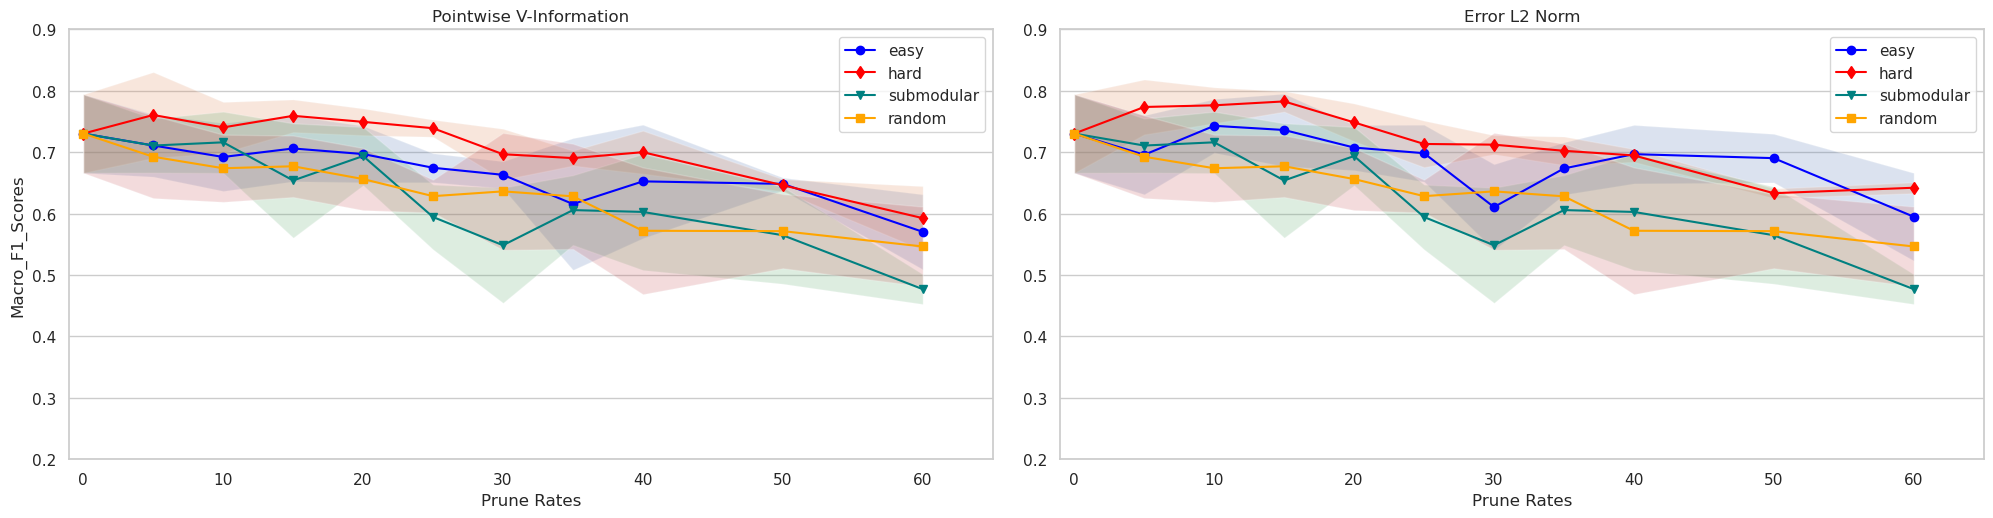

In [13]:
get_plots_informed(pvi_easy_sexism, pvi_hard_sexism, 
                   el2n_easy_sexism, el2n_hard_sexism,
                   submod_scores_sexism, random_scores_sexism, 
                   fig_name = 'sexism_informed', title = 'Macro_F1_Scores')

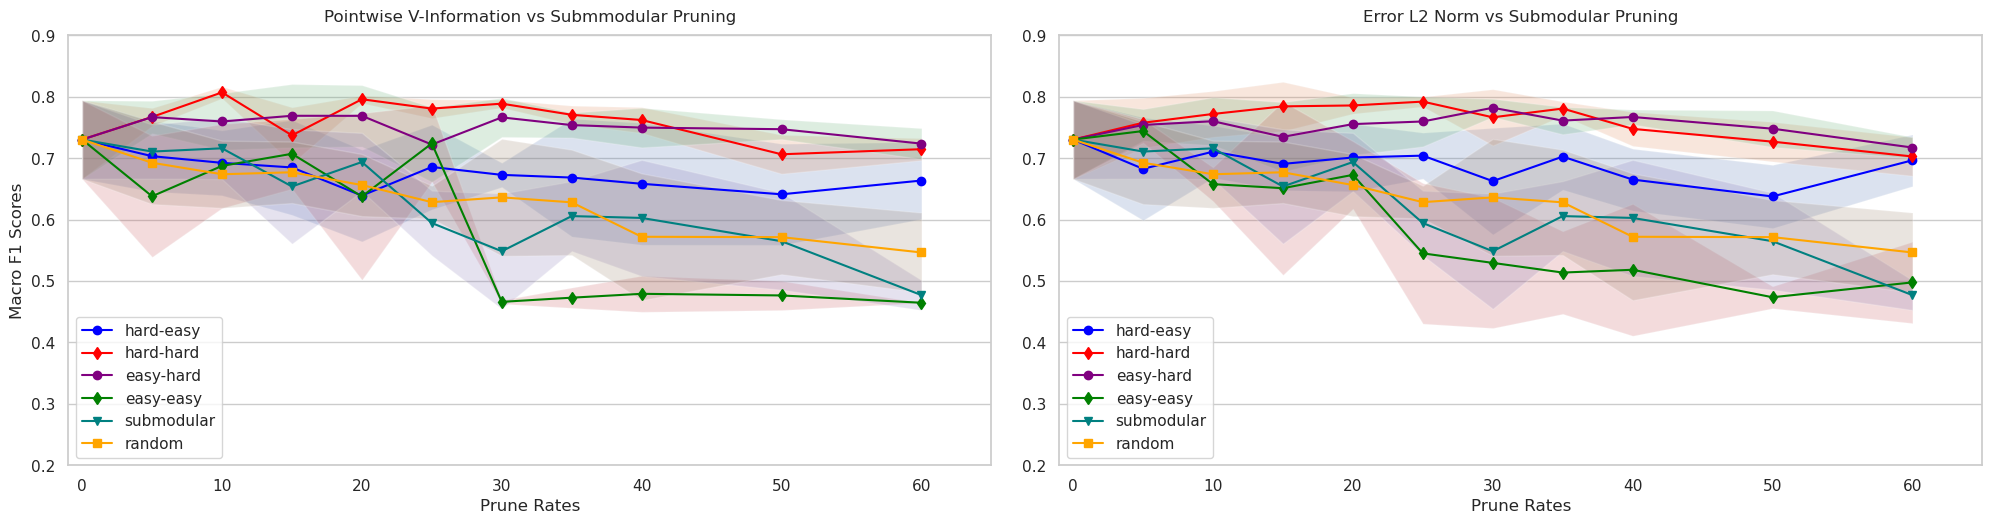

In [14]:
get_proportional_plots(pvi_hard_easy_sexism, pvi_hard_hard_sexism, pvi_easy_hard_sexism, pvi_easy_easy_sexism,
                      el2n_hard_easy_sexism, el2n_hard_hard_sexism, el2n_easy_hard_sexism, el2n_easy_easy_sexism,
                      random_scores_sexism, submod_scores_sexism, 
                       fig_name = 'sexism_proportional', title = 'Macro F1 Scores')

## Creating plots for other data sets

In [15]:
el2n_easy_sexism_eval = get_informed_undersampling_scores(data_name = 'sexism_eval', inf_score = 'el2n', 
                                                               prune_type = 'easy', no_prune_data = no_prune_sexism_eval)
el2n_hard_sexism_eval = get_informed_undersampling_scores(data_name = 'sexism_eval', inf_score = 'el2n', 
                                                               prune_type = 'hard', no_prune_data = no_prune_sexism_eval)
pvi_easy_sexism_eval = get_informed_undersampling_scores(data_name = 'sexism_eval', inf_score = 'pvi', 
                                                    prune_type = 'easy', no_prune_data = no_prune_sexism_eval)
pvi_hard_sexism_eval = get_informed_undersampling_scores(data_name = 'sexism_eval', inf_score = 'pvi', 
                                                    prune_type = 'hard', no_prune_data = no_prune_sexism_eval)

In [16]:
el2n_easy_easy_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'el2n', prune_type_sexist = 'easy', 
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism_eval)
el2n_easy_hard_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'el2n', prune_type_sexist = 'easy',
                                                prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism_eval)
el2n_hard_easy_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'el2n', prune_type_sexist = 'hard',
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism_eval)
el2n_hard_hard_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'el2n', prune_type_sexist = 'hard',
                                                prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism_eval)
pvi_easy_easy_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'pvi', prune_type_sexist = 'easy', 
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism_eval)
pvi_easy_hard_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'pvi', prune_type_sexist = 'easy',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism_eval)
pvi_hard_easy_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_sexism_eval)
pvi_hard_hard_sexism_eval = get_proportional_scores(data_name = 'sexism_eval', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_sexism_eval)


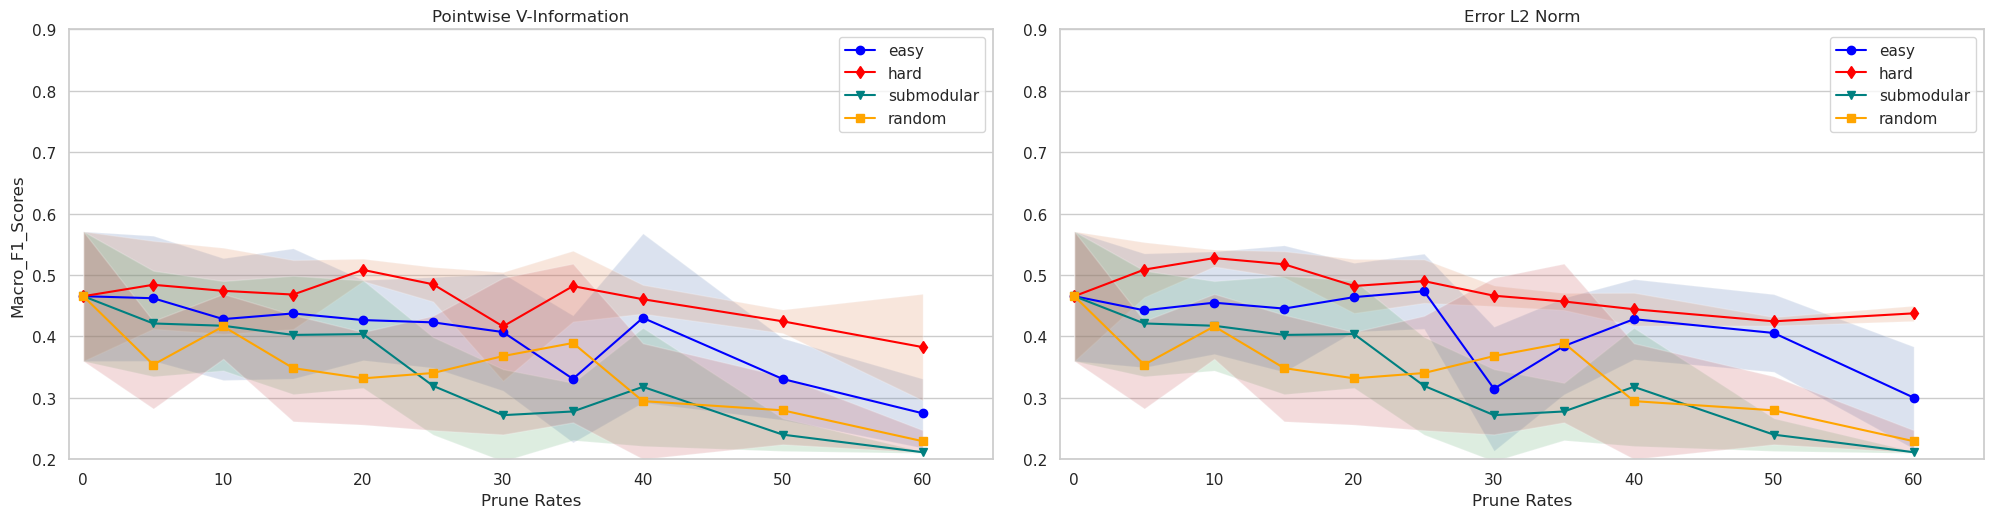

In [17]:
get_plots_informed(pvi_easy_sexism_eval, pvi_hard_sexism_eval, 
                   el2n_easy_sexism_eval, el2n_hard_sexism_eval,
                   submod_scores_sexism_eval, random_scores_sexism_eval, 
                   fig_name = 'sexism_eval_informed', title = 'Macro_F1_Scores')

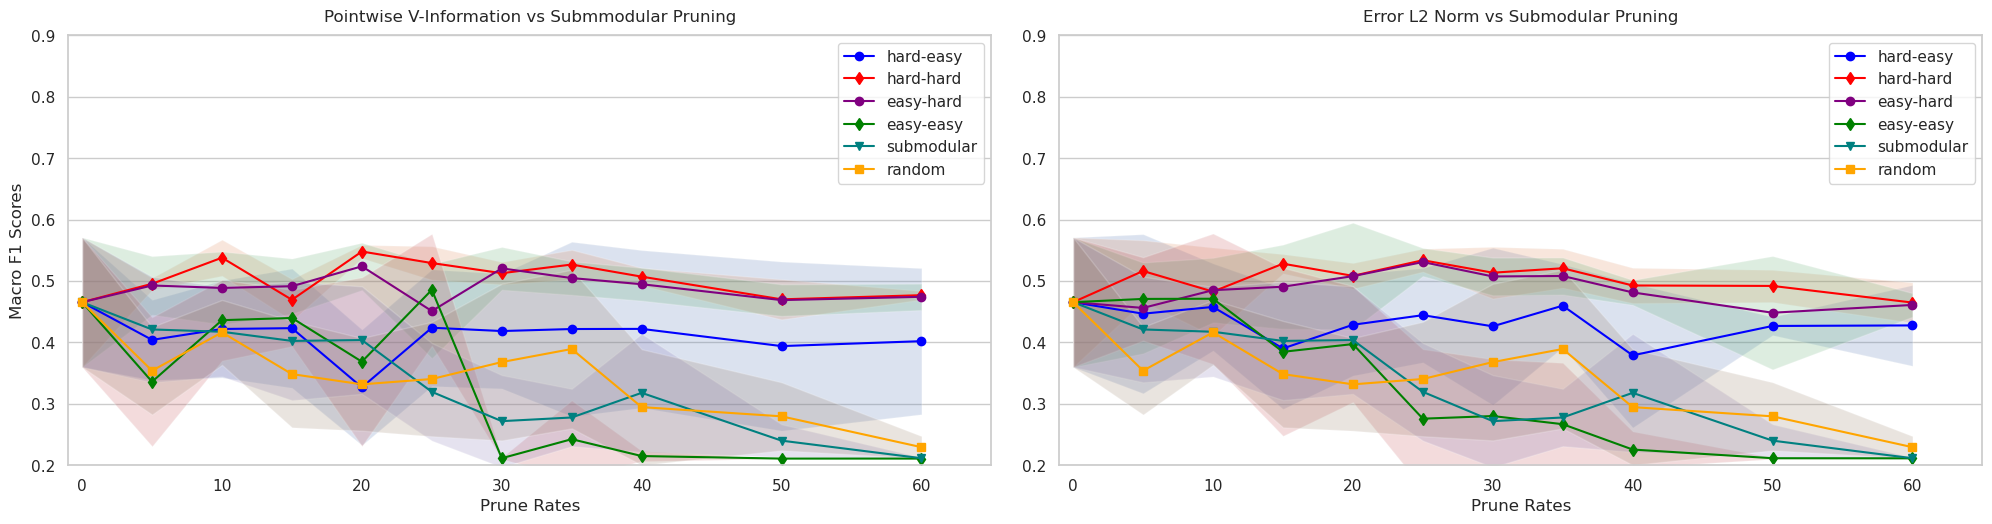

In [18]:
get_proportional_plots(pvi_hard_easy_sexism_eval, pvi_hard_hard_sexism_eval, pvi_easy_hard_sexism_eval, pvi_easy_easy_sexism_eval,
                      el2n_hard_easy_sexism_eval, el2n_hard_hard_sexism_eval, el2n_easy_hard_sexism_eval, el2n_easy_easy_sexism_eval,
                      random_scores_sexism_eval, submod_scores_sexism_eval, 
                       fig_name = 'sexism_eval_proportional', title = 'Macro F1 Scores')

In [19]:
el2n_easy_ood_1 = get_informed_undersampling_scores(data_name = 'ood_1', inf_score = 'el2n', 
                                                               prune_type = 'easy', no_prune_data = no_prune_ood_1)
el2n_hard_ood_1 = get_informed_undersampling_scores(data_name = 'ood_1', inf_score = 'el2n', 
                                                               prune_type = 'hard', no_prune_data = no_prune_ood_1)
pvi_easy_ood_1 = get_informed_undersampling_scores(data_name = 'ood_1', inf_score = 'pvi', 
                                                    prune_type = 'easy', no_prune_data = no_prune_ood_1)
pvi_hard_ood_1 = get_informed_undersampling_scores(data_name = 'ood_1', inf_score = 'pvi', 
                                                    prune_type = 'hard', no_prune_data = no_prune_ood_1)

In [20]:
el2n_easy_easy_ood_1= get_proportional_scores(data_name = 'ood_1', inf_score = 'el2n', prune_type_sexist = 'easy', 
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_1)
el2n_easy_hard_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'el2n', prune_type_sexist = 'easy',
                                                prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_1)
el2n_hard_easy_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'el2n', prune_type_sexist = 'hard',
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_1)
el2n_hard_hard_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'el2n', prune_type_sexist = 'hard',
                                                prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_1)
pvi_easy_easy_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'pvi', prune_type_sexist = 'easy', 
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_1)
pvi_easy_hard_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'pvi', prune_type_sexist = 'easy',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_1)
pvi_hard_easy_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_1)
pvi_hard_hard_ood_1 = get_proportional_scores(data_name = 'ood_1', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_1)

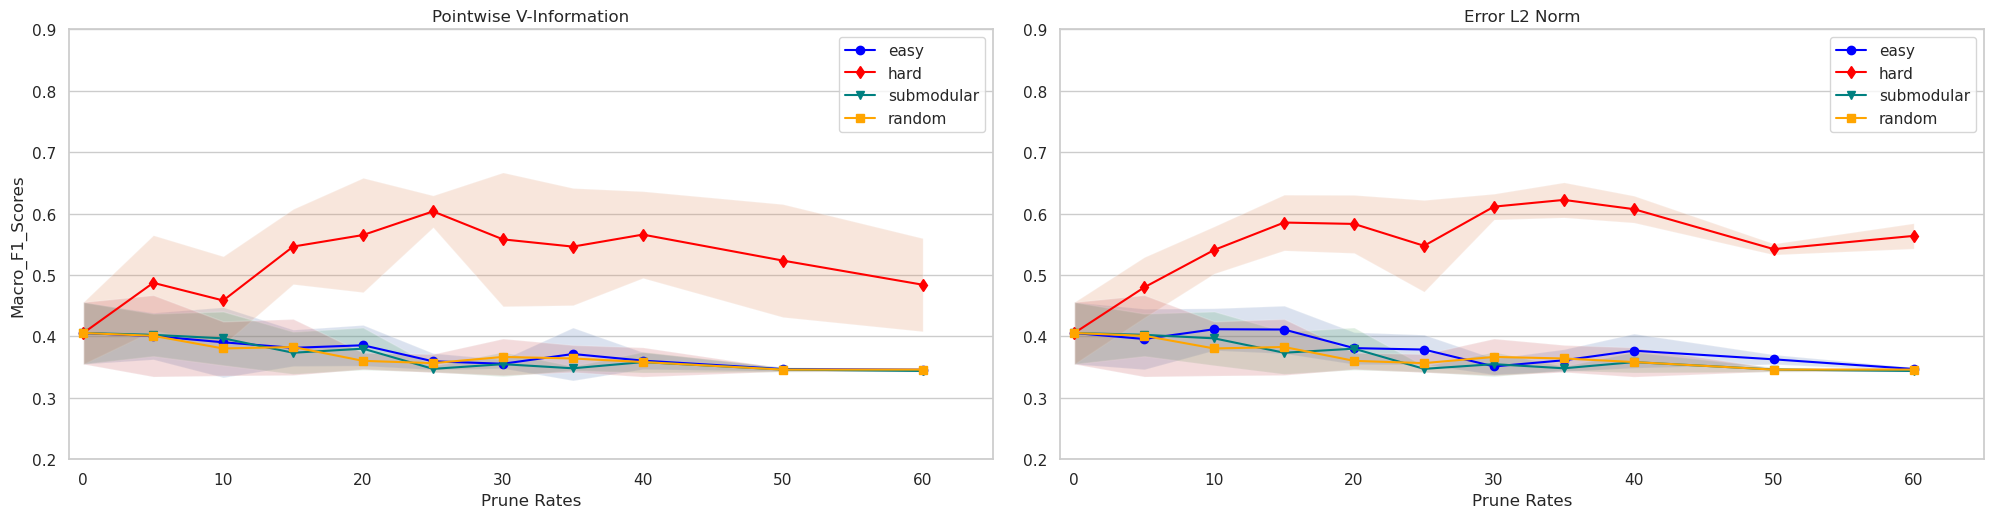

In [21]:
get_plots_informed(pvi_easy_ood_1, pvi_hard_ood_1, 
                   el2n_easy_ood_1, el2n_hard_ood_1,
                   submod_scores_ood_1, random_scores_ood_1, 
                   fig_name = 'ood_1_informed', title = 'Macro_F1_Scores')

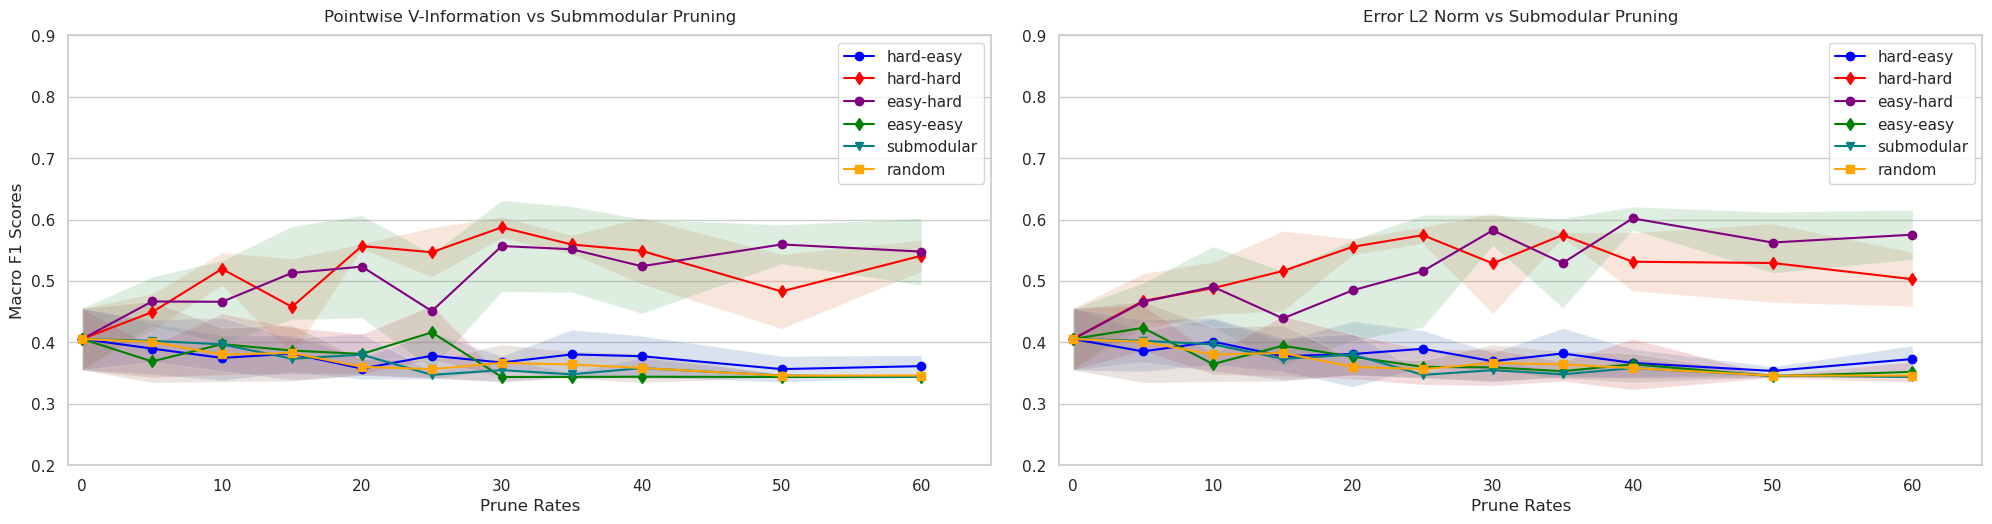

In [22]:
get_proportional_plots(pvi_hard_easy_ood_1, pvi_hard_hard_ood_1, pvi_easy_hard_ood_1, pvi_easy_easy_ood_1,
                      el2n_hard_easy_ood_1, el2n_hard_hard_ood_1, el2n_easy_hard_ood_1, el2n_easy_easy_ood_1,
                      random_scores_ood_1, submod_scores_ood_1, 
                       fig_name = 'ood_1_proportional', title = 'Macro F1 Scores')

In [23]:
el2n_easy_ood_3 = get_informed_undersampling_scores(data_name = 'ood_3', inf_score = 'el2n', 
                                                               prune_type = 'easy', no_prune_data = no_prune_ood_3)
el2n_hard_ood_3 = get_informed_undersampling_scores(data_name = 'ood_3', inf_score = 'el2n', 
                                                               prune_type = 'hard', no_prune_data = no_prune_ood_3)
pvi_easy_ood_3 = get_informed_undersampling_scores(data_name = 'ood_3', inf_score = 'pvi', 
                                                    prune_type = 'easy', no_prune_data = no_prune_ood_3)
pvi_hard_ood_3 = get_informed_undersampling_scores(data_name = 'ood_3', inf_score = 'pvi', 
                                                    prune_type = 'hard', no_prune_data = no_prune_ood_3)

In [24]:
el2n_easy_easy_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'el2n', prune_type_sexist = 'easy', 
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_3)
el2n_easy_hard_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'el2n', prune_type_sexist = 'easy',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_3)
el2n_hard_easy_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'el2n', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_3)
el2n_hard_hard_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'el2n', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_3)
pvi_easy_easy_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'pvi', prune_type_sexist = 'easy', 
                                                prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_3)
pvi_easy_hard_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'pvi', prune_type_sexist = 'easy',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_3)
pvi_hard_easy_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'easy', no_prune_data = no_prune_ood_3)
pvi_hard_hard_ood_3 = get_proportional_scores(data_name = 'ood_3', inf_score = 'pvi', prune_type_sexist = 'hard',
                                               prune_type_non_sexist = 'hard', no_prune_data = no_prune_ood_3)

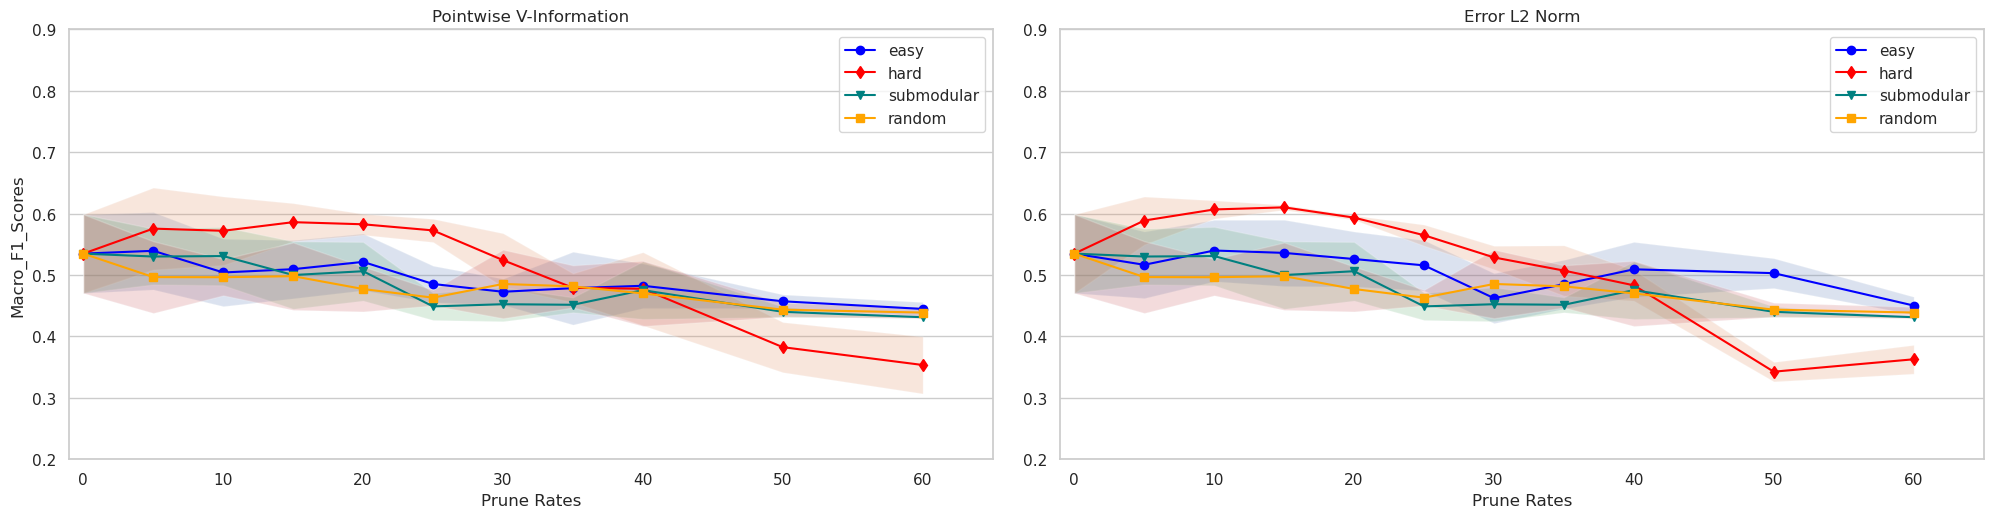

In [25]:
get_plots_informed(pvi_easy_ood_3, pvi_hard_ood_3, 
                   el2n_easy_ood_3, el2n_hard_ood_3,
                   submod_scores_ood_3, random_scores_ood_3, 
                   fig_name = 'ood_3_informed', title = 'Macro_F1_Scores')

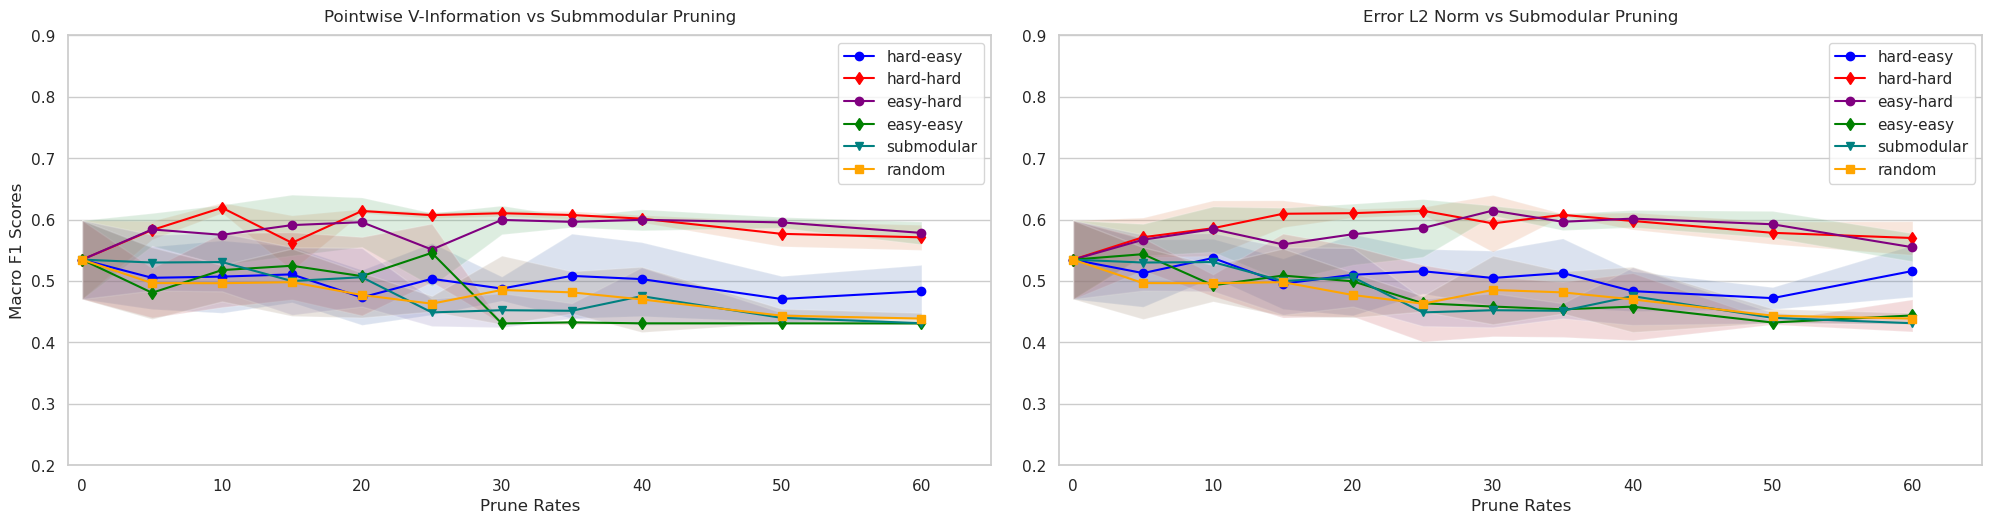

In [26]:
get_proportional_plots(pvi_hard_easy_ood_3, pvi_hard_hard_ood_3, pvi_easy_hard_ood_3, pvi_easy_easy_ood_3,
                      el2n_hard_easy_ood_3, el2n_hard_hard_ood_3, el2n_easy_hard_ood_3, el2n_easy_easy_ood_3,
                      random_scores_ood_3, submod_scores_ood_3, 
                       fig_name = 'ood_3_proportional', title = 'Macro F1 Scores')